In [36]:
import os
import h5py
import bilby
import corner
import numpy as np

In [5]:
res_nest = bilby.core.result.read_in_result("/home/noah.wolfe/MA499_report_runs/real/pure-gr/GW150914/hybrid_pure-gr_GW150914/result/hybrid_pure-gr_GW150914_data0_1126259462-391_analysis_H1L1_dynesty_result.json")

In [6]:
res_pt = bilby.core.result.read_in_result("/home/noah.wolfe/MA499_report_runs/real/pure-gr/GW150914/hybrid_pure-gr_GW150914/result/hybrid_pure-gr_GW150914_data0_1126259462-391_analysis_H1L1_dynesty_d_phi_2_no-overlap_result.json")

In [55]:

with h5py.File("./GW150914_GWTC-1.hdf5", 'r') as datafile:
    dset = datafile['IMRPhenomPv2_posterior']
    print(dset.dtype)
    
    m1 = dset["m1_detector_frame_Msun"]
    m2 = dset["m2_detector_frame_Msun"]
    chirp_mass = (m1 * m2)**(3/5) / (m1 + m2)**(1/5)
    mass_ratio = m2 / m1
    ra = dset["right_ascension"]
    dec = dset["declination"]

    gw150914_data = np.column_stack((
        chirp_mass, mass_ratio, ra, dec
    ))


[('costheta_jn', '<f8'), ('luminosity_distance_Mpc', '<f8'), ('right_ascension', '<f8'), ('declination', '<f8'), ('m1_detector_frame_Msun', '<f8'), ('m2_detector_frame_Msun', '<f8'), ('spin1', '<f8'), ('spin2', '<f8'), ('costilt1', '<f8'), ('costilt2', '<f8')]


In [58]:
hybrid_data = np.column_stack((
    res_pt.samples[:,0],
    res_pt.samples[:,1],
    res_pt.samples[:,10], # azimuth
    res_pt.samples[:,11], # zenith
))

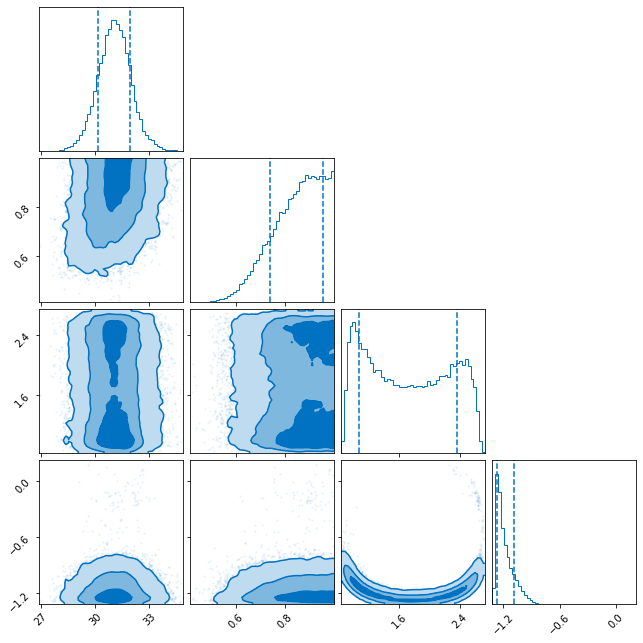

In [60]:
gw150914_fig = corner.corner(
    gw150914_data, 
    **dict(
        bins=50, smooth=0.9, label_kwargs=dict(fontsize=16),
        title_kwargs=dict(fontsize=16), color='#0072C1',
        truth_color='tab:orange', quantiles=[0.16, 0.84],
        levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
        plot_density=False, plot_datapoints=True, fill_contours=True,
        max_n_ticks=3, hist_kwargs=dict(density=True)
    )
)

In [64]:
all_fig = corner.corner(
    hybrid_data,
    **dict(
        fig=gw150914_fig, bins=50, smooth=0.9, label_kwargs=dict(fontsize=16),
        title_kwargs=dict(fontsize=16), color='#FF8C00',
        truth_color='black', quantiles=[0.16, 0.84],
        levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
        plot_density=False, plot_datapoints=True, fill_contours=True,
        max_n_ticks=3, hist_kwargs=dict(density=True)
    )
)

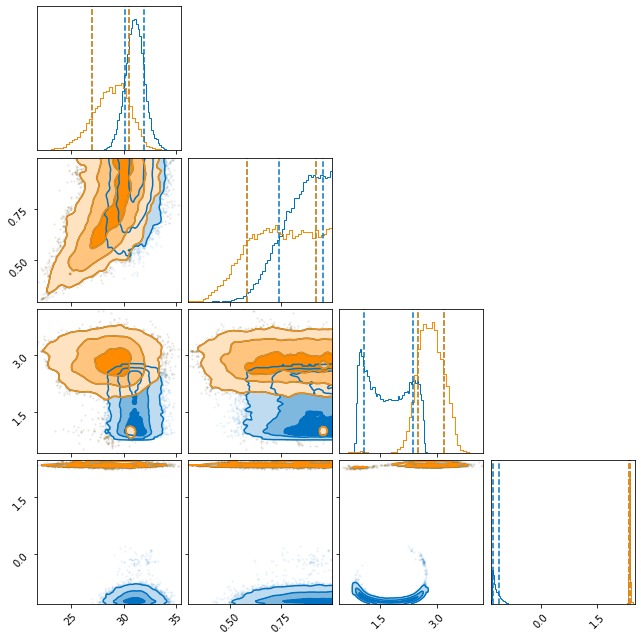

In [65]:
all_fig

In [52]:
pt_corner = res_pt.plot_corner(parameters=["chirp_mass", "mass_ratio", "azimuth", "zenith", "delta_phi_3"])

In [28]:
nest_corner = res_nest.plot_corner(parameters=["chirp_mass", "mass_ratio", "ra", "dec"])

In [56]:
nest_axes = nest_corner.get_axes()
pt_axes   = pt_corner.get_axes()

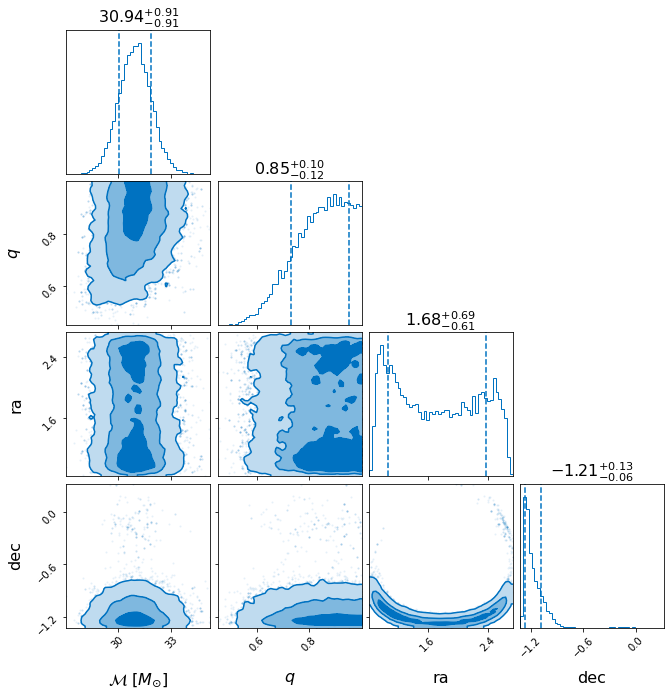

In [29]:
nest_corner

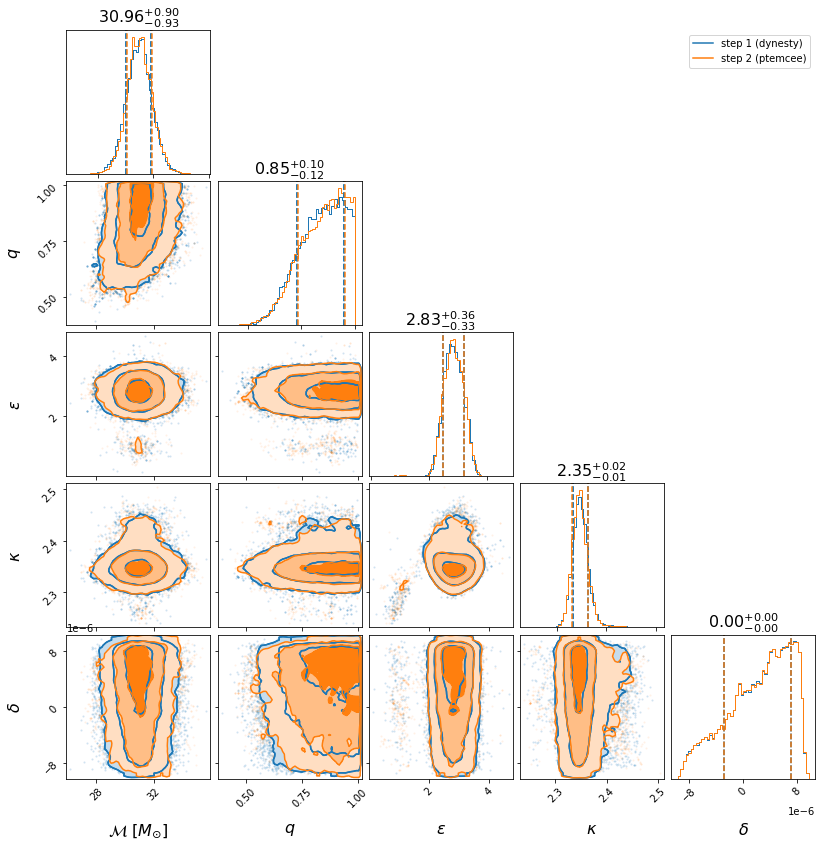

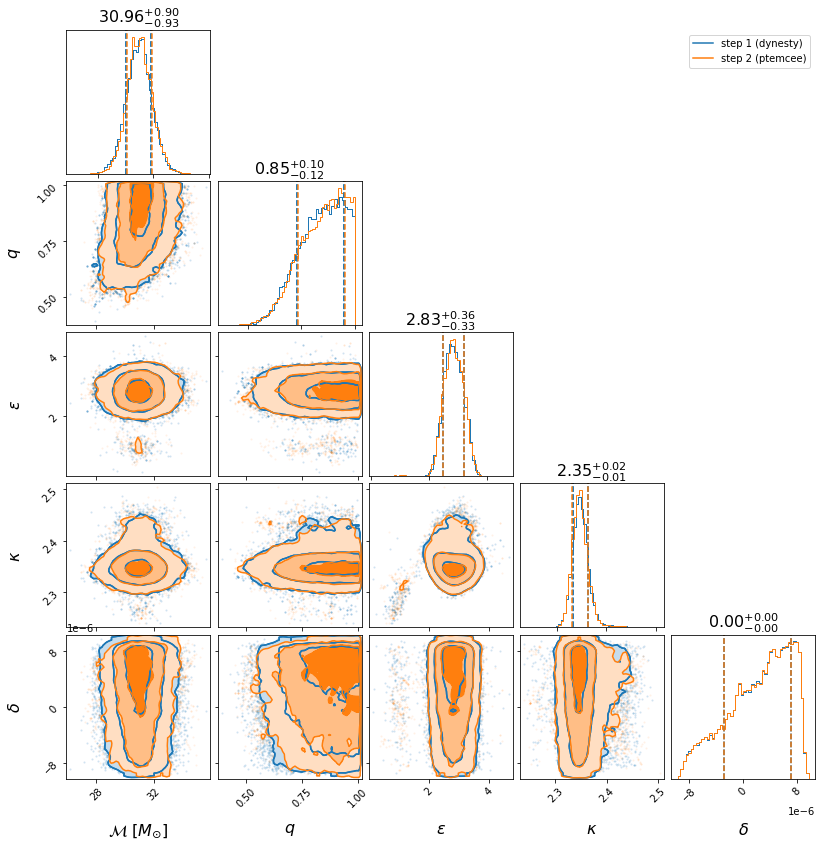

In [91]:
bilby.core.result.plot_multiple(
    [res_nest, res_pt],
    labels=["step 1 (dynesty)", "step 2 (ptemcee)"],
    parameters=["chirp_mass", "mass_ratio", "azimuth", "zenith", "delta_phi_3"]
)